# Customer Lifetime Value Using Machine Learning

## Business Problem
### Context
Ini adalah Dataset dengan polis asuransi kendaraan mereka. Rincian tentang pelanggan dan asuransi yang diambil untuk kendaraan mereka disediakan yang dapat dieksplorasi untuk segmen pelanggan sejenis.

Asuransi kendaraan (juga dikenal sebagai asuransi mobil, asuransi kendaraan bermotor, atau asuransi mobil) adalah asuransi untuk mobil, truk, sepeda motor, dan kendaraan jalan lainnya. Penggunaan utamanya adalah untuk memberikan perlindungan finansial terhadap kerusakan fisik atau cedera tubuh akibat tabrakan lalu lintas dan terhadap tanggung jawab yang juga dapat timbul dari insiden di dalam kendaraan. Asuransi kendaraan tambahan dapat menawarkan perlindungan finansial terhadap pencurian kendaraan, dan terhadap kerusakan kendaraan yang disebabkan oleh peristiwa selain tabrakan lalu lintas, seperti kuncian, cuaca atau bencana alam, dan kerusakan yang disebabkan oleh tabrakan dengan benda-benda yang tidak bergerak. Dengan itu Perusahaan A Insurance menawarkan banyak discount dan bonus kepada customer setia mereka.

### Problem Statement
Customer Lifetime Value mewakili nilai pelanggan bagi perusahaan selama periode waktu tertentu. Ini adalah pasar yang kompetitif bagi perusahaan asuransi pada tahun 2019, dan premi asuransi bukan satu-satunya faktor penentu dalam keputusan pelanggan. CLV adalah metrik yang berpusat pada pelanggan, dan dasar yang kuat untuk membangun untuk mempertahankan pelanggan yang berharga, meningkatkan pendapatan dari pelanggan yang kurang berharga, dan meningkatkan pengalaman pelanggan secara keseluruhan.

Perusahaan Asuransi Mobil menghadapi masalah dalam mempertahankan pelanggannya dan ingin mengiklankan penawaran promosi untuk pelanggan setianya. Mereka mempertimbangkan CLV sebagai parameter untuk mengklasifikasikan pelanggan setia.

### Goals
Meningkatkan pendapatan perusahaan dari pertambahan pelanggan yang menggunakan jasa asuransi dari perusahaan kami. Dengan cara memprediksi Customer Lifetime Value dengan menggunakan machine learning

### Evaluation Metrics
Dengan menggunakan model RMSE dan R2 Score. Lalu membandingkan model RMSE dan R2 Score dan memilih model terbaik 

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Vehicle Class | Object | Tipe Mobil |
| Coverage | Object | Jenis Asuransi |
| Renew Offer Type | Object | Jenis Polis |
| Employment Status | Object | Status Pekerjaan |
| Marital Status | Object | Status Nikah |
| Education | Object | Pendidikan Terakhir |
| Number of Policies | Integer | Nomor Polis  |
| Monthly Premium Auto | Interger | Jumlah Bulan yang sudah dibayar |
| Total Claim Amount | Float | Total yang sudah di ambil |
| Income | Integer | Penghasilan |
| Customer Lifetime Value | Float | Nilai Umur Pelanggan |

<br>

### Import Libraries

In [143]:
import pandas as pd
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, PowerTransformer, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import  train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import AdaBoostRegressor

In [2]:
df = pd.read_csv('data_customer_lifetime_value.csv')
df

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2,90,571.479602,11828,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6,62,114.514440,44762,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2,62,257.248789,21514,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1,116,556.800000,17913,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1,62,355.820799,19030,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1,74,532.800000,0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2,109,523.200000,27778,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1,62,44.780402,84658,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7,239,1294.700423,22705,19160.989940


In [5]:
print("The number of rows:",df.shape[0])
print("The number of columns:",df.shape[1])

The number of rows: 5669
The number of columns: 11


In [6]:
df.rename(columns={'Customer Lifetime Value':'CLV'},inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Vehicle Class         5669 non-null   object 
 1   Coverage              5669 non-null   object 
 2   Renew Offer Type      5669 non-null   object 
 3   EmploymentStatus      5669 non-null   object 
 4   Marital Status        5669 non-null   object 
 5   Education             5669 non-null   object 
 6   Number of Policies    5669 non-null   int64  
 7   Monthly Premium Auto  5669 non-null   int64  
 8   Total Claim Amount    5669 non-null   float64
 9   Income                5669 non-null   int64  
 10  CLV                   5669 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 487.3+ KB


### Summary Statistics of Numerical features

In [12]:
numerical_cols = df.select_dtypes(include=["int64","float64"])

In [13]:
numerical_cols.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,CLV
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


### Check Missing Values

In [14]:
df.isnull().sum()

Vehicle Class           0
Coverage                0
Renew Offer Type        0
EmploymentStatus        0
Marital Status          0
Education               0
Number of Policies      0
Monthly Premium Auto    0
Total Claim Amount      0
Income                  0
CLV                     0
dtype: int64

## EDA
## Numerical Features
### CLV - Target variable analysis

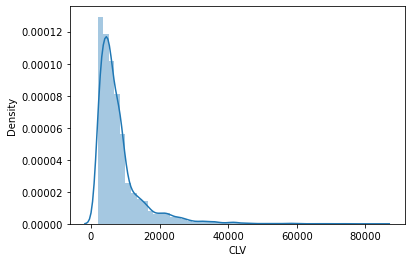

In [15]:
sns.distplot(df["CLV"])
# plt.savefig("CLV.png")
plt.show()

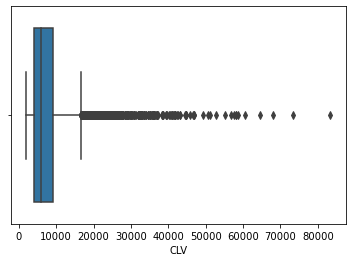

In [16]:
sns.boxplot(df["CLV"])
plt.show()

In [17]:
df["CLV"].skew()

3.06110718900048

## INCOME
#### Uninvariate Analysis

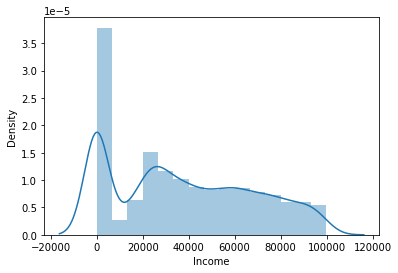

In [19]:
sns.distplot(df["Income"])
plt.show()

#### Bivariate Analysis

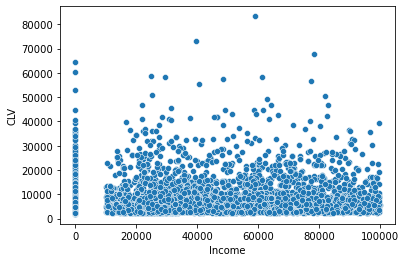

In [20]:
sns.scatterplot(df["Income"],df["CLV"])
plt.show()

##### Mempunyai hubungan linear antara Income dan CLV

#### Monthly Premium Auto

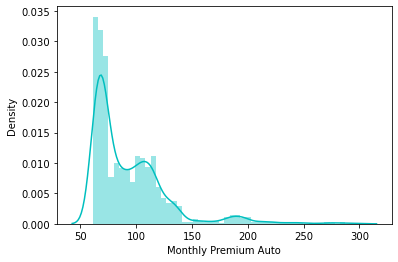

In [21]:
sns.distplot(df["Monthly Premium Auto"],color='c')
plt.show()

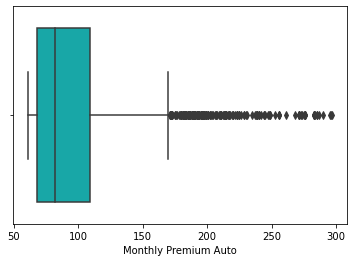

In [22]:
sns.boxplot(df["Monthly Premium Auto"],color='c')
plt.show()

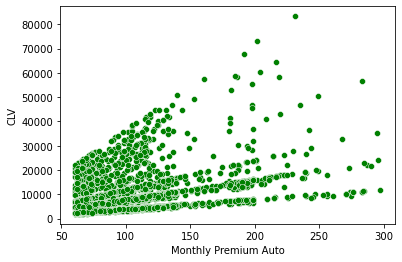

In [24]:
sns.scatterplot(df["Monthly Premium Auto"],df["CLV"],color='g')
plt.show()

##### Mempunyai Hubungan Linear antara Monthly Premium Auto dan CLV

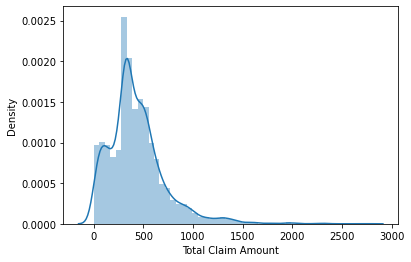

In [32]:
sns.distplot(df['Total Claim Amount'])
plt.show()

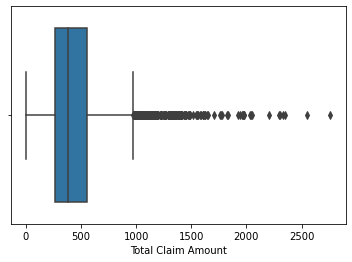

In [30]:
sns.boxplot(df["Total Claim Amount"])
plt.show()

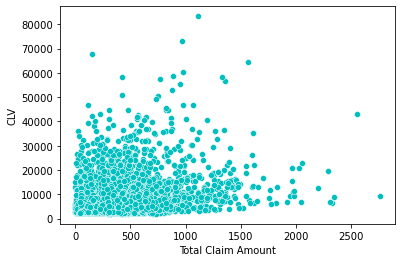

In [31]:
sns.scatterplot(df["Total Claim Amount"],df["CLV"],color='c')
plt.show()

##### There is a linear relationship between CLV and Total Claim Amount

##### The monthly premium auto and income feature has multiple peak's so to remove those peaks we can apply any of the power transformation (SQUARE / CUBE)

## Categorical variables

In [53]:
cat_cols = df.select_dtypes(include="object")

In [54]:
no_col = df["Number of Policies"]

In [55]:
cat_cols = pd.concat([cat_cols,no_col],axis=1)

In [57]:
cat_cols.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1


In [58]:
cat_cols.columns

Index(['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus',
       'Marital Status', 'Education', 'Number of Policies'],
      dtype='object')

In [59]:
for i in cat_cols:
    print("Unique values in",str(i),"is",df[i].nunique())
    print(df[i].value_counts())
    print("-----------------------------------------")

Unique values in Vehicle Class is 6
Four-Door Car    2858
Two-Door Car     1186
SUV              1096
Sports Car        307
Luxury SUV        115
Luxury Car        107
Name: Vehicle Class, dtype: int64
-----------------------------------------
Unique values in Coverage is 3
Basic       3477
Extended    1704
Premium      488
Name: Coverage, dtype: int64
-----------------------------------------
Unique values in Renew Offer Type is 4
Offer1    2292
Offer2    1835
Offer3     900
Offer4     642
Name: Renew Offer Type, dtype: int64
-----------------------------------------
Unique values in EmploymentStatus is 5
Employed         3541
Unemployed       1429
Medical Leave     267
Disabled          252
Retired           180
Name: EmploymentStatus, dtype: int64
-----------------------------------------
Unique values in Marital Status is 3
Married     3305
Single      1514
Divorced     850
Name: Marital Status, dtype: int64
-----------------------------------------
Unique values in Education is 5


### Vehicle Class

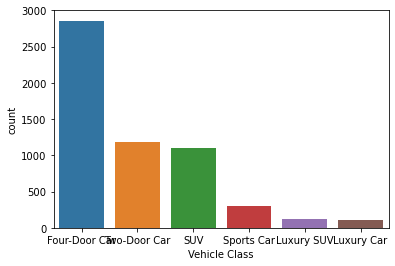

In [34]:
sns.countplot(df["Vehicle Class"])
plt.show()

In [35]:
##### Coverage

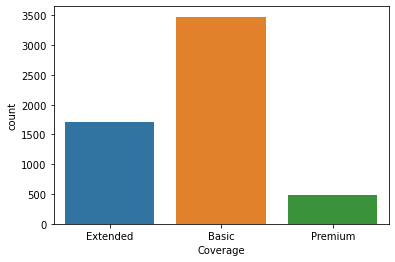

In [36]:
sns.countplot(df["Coverage"])
plt.show()

In [37]:
##### Renew Offer Type

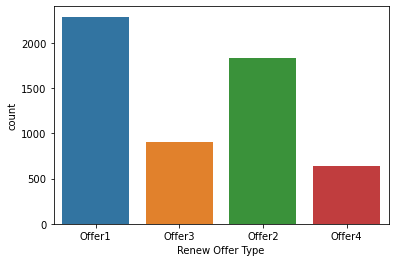

In [38]:
sns.countplot(df["Renew Offer Type"])
plt.show()

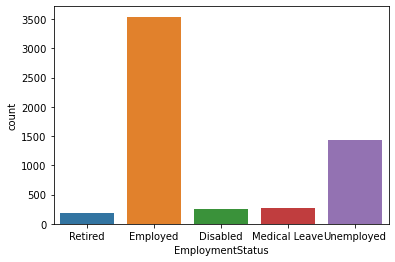

In [41]:
sns.countplot(df["EmploymentStatus"])
plt.show()

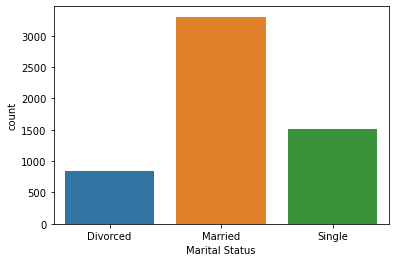

In [42]:
sns.countplot(df["Marital Status"])
plt.show()

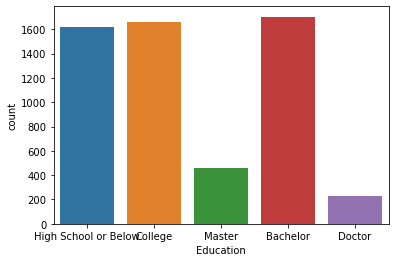

In [43]:
sns.countplot(df["Education"])
plt.show()

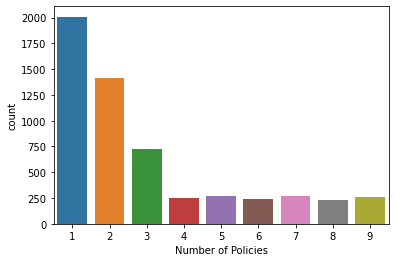

In [44]:
sns.countplot(df["Number of Policies"])
plt.show()

## HeatMap

In [48]:
heatmap = df[['CLV', 'Income', 'Monthly Premium Auto','Total Claim Amount']]

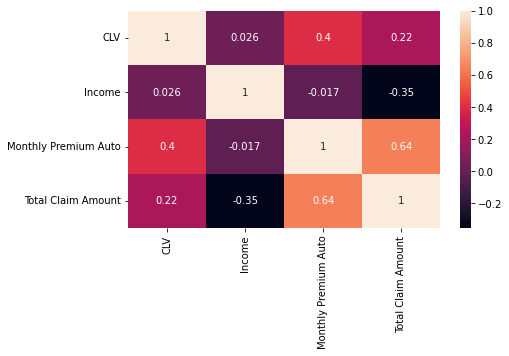

In [49]:
plt.figure(figsize=(7,4))
sns.heatmap(heatmap.corr(),annot=True)
# plt.savefig("Heatmap.png")
plt.show()

##### Kita dapat melihat dengan jelas di heatmap, bahwa customer lifetime value memiliki korelasi monthly premium auto dan korelasi yang dapat diterima dengan total claim amount.

## Data Preprocessing

In [73]:
cat_cols.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1


In [74]:
catg=pd.get_dummies(cat_cols,drop_first=True)

In [75]:
numerical_cols.head()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,CLV
0,2,90,571.479602,11828,10083.486880
1,6,62,114.514440,44762,4943.386117
2,2,62,257.248789,21514,11981.984810
3,1,116,556.800000,17913,4550.856045
4,1,62,355.820799,19030,2372.155492


In [76]:
dfn = pd.concat([numerical_cols,catg],axis=1)
dfn.head()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,CLV,Number of Policies,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,...,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Marital Status_Married,Marital Status_Single,Education_College,Education_Doctor,Education_High School or Below,Education_Master
0,2,90,571.479602,11828,10083.486880,2,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,6,62,114.514440,44762,4943.386117,6,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
2,2,62,257.248789,21514,11981.984810,2,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3,1,116,556.800000,17913,4550.856045,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,62,355.820799,19030,2372.155492,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [123]:
dfn.rename(columns={'CLV':'CLV'},inplace=True)

In [125]:
df2 = df.copy()

In [126]:
datadesc = []
for i in df2.columns:
    datadesc.append([i,
                     df2[i].dtypes,
                     df2[i].isna().sum(),
                     round((df2[i].isna().sum()/len(df2)*100),2),
                     df2[i].nunique(),
                     df2[i].drop_duplicates().sample(1).values])

pd.DataFrame(datadesc,columns=['Data Features',
                               'Data Types',
                               'Null',
                               'Null Percentage',
                               'Unique',
                               'Unique Sample'])

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,Vehicle Class,object,0,0.0,6,[Luxury SUV]
1,Coverage,object,0,0.0,3,[Extended]
2,Renew Offer Type,object,0,0.0,4,[Offer2]
3,EmploymentStatus,object,0,0.0,5,[Medical Leave]
4,Marital Status,object,0,0.0,3,[Married]
5,Education,object,0,0.0,5,[Master]
6,Number of Policies,int64,0,0.0,9,[2]
7,Monthly Premium Auto,int64,0,0.0,191,[173]
8,Total Claim Amount,float64,0,0.0,3274,[639.105556]
9,Income,int64,0,0.0,3625,[64431]


In [127]:
df2.duplicated().sum()

618

In [128]:
df2.drop_duplicates(inplace=True)

In [129]:
df2.duplicated().sum()

0

In [131]:
df2[df2['Income']==0]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,CLV
16,Four-Door Car,Basic,Offer2,Unemployed,Married,Bachelor,7,64,307.200000,0,4774.751709
17,SUV,Extended,Offer1,Unemployed,Single,College,1,129,1178.950186,0,4711.845199
21,SUV,Extended,Offer4,Unemployed,Single,Bachelor,1,126,907.200000,0,4531.675269
24,Two-Door Car,Extended,Offer1,Unemployed,Divorced,Bachelor,5,95,456.000000,0,6846.150323
26,Four-Door Car,Basic,Offer4,Unemployed,Single,Bachelor,1,66,475.200000,0,2239.647297
...,...,...,...,...,...,...,...,...,...,...,...
5651,SUV,Extended,Offer1,Unemployed,Single,High School or Below,1,129,1486.410662,0,4502.867562
5652,Four-Door Car,Extended,Offer4,Unemployed,Married,Bachelor,5,95,456.000000,0,6661.744145
5655,Two-Door Car,Basic,Offer1,Unemployed,Married,Bachelor,9,67,132.443705,0,4927.707574
5660,Two-Door Car,Basic,Offer2,Unemployed,Single,College,7,72,391.636628,0,4936.888359


In [132]:
df2.drop(df2[(df2['Income']==0)].index, inplace =True)

In [134]:
df2[df2['Income']==0]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,CLV


In [ ]:
df2

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,CLV
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2,90,571.479602,11828,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6,62,114.514440,44762,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2,62,257.248789,21514,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1,116,556.800000,17913,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1,62,355.820799,19030,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5662,Luxury Car,Premium,Offer2,Employed,Married,Doctor,9,296,498.159874,79655,23984.621440
5663,Four-Door Car,Basic,Offer1,Employed,Married,High School or Below,2,69,446.084760,30595,8114.409136
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2,109,523.200000,27778,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1,62,44.780402,84658,2447.053134


### OLS MODEL

In [81]:
X=dfn.drop(['CLV'],axis=1)
y=dfn['CLV']
X_constant=sm.add_constant(X)
lin_reg=sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CLV   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     49.29
Date:                Mon, 23 May 2022   Prob (F-statistic):          6.29e-212
Time:                        22:58:09   Log-Likelihood:                -57628.
No. Observations:                5669   AIC:                         1.153e+05
Df Residuals:                    5644   BIC:                         1.155e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           1095.3058    956.491      1.145      0.252    -779.784    2970.396
Number of Policies                20.6374     17.639      1.170      0.242     -13.941      55.216
Monthly Premium Auto              75.8491     12.585      6.027      0.000      51.177     100.521
Total Claim Amount                -1.2945      0.445     -2.912      0.004      -2.166      -0.423
Income                             0.0002      0.005      0.050      0.960      -0.009       0.010
Number of Policies                20.6374     17.639      1.170      0.242     -13.941      55.216
Vehicle Class_Luxury Car        1013.9448   1738.360      0.583      0.560   -2393.909    4421.799
Vehicle Class_Luxury SUV        1470.4278   1748.376      0.841      0.400   -1957.062    4897.917
Vehicle Class_SUV                638.6967    581.724      1.098      0.272    -501.705    1779.099
Vehicle Class_Sports Car        1250.6211    664.296      1.883      0.060     -51.654    2552.896
Vehicle Class_Two-Door Car       106.2611    218.239      0.487      0.626    -321.572     534.094
Coverage_Extended                107.8578    314.627      0.343      0.732    -508.932     724.647
Coverage_Premium                 217.8611    674.672      0.323      0.747   -1104.755    1540.477
Renew Offer Type_Offer2        -1073.1429    206.196     -5.204      0.000   -1477.366    -668.920
Renew Offer Type_Offer3         -721.3667    251.834     -2.864      0.004   -1215.057    -227.676
Renew Offer Type_Offer4        -1113.3610    290.869     -3.828      0.000   -1683.577    -543.146
EmploymentStatus_Employed        666.8407    450.507      1.480      0.139    -216.327    1550.008
EmploymentStatus_Medical Leave   691.4727    555.042      1.246      0.213    -396.624    1779.569
EmploymentStatus_Retired        -157.4172    618.845     -0.254      0.799   -1370.591    1055.757
EmploymentStatus_Unemployed      219.4246    452.226      0.485      0.628    -667.113    1105.962
Marital Status_Married             8.7488    248.264      0.035      0.972    -477.944     495.441
Marital Status_Single           -123.0811    286.152     -0.430      0.667    -684.049     437.887
Education_College               -223.7756    217.926     -1.027      0.305    -650.995     203.444
Education_Doctor                -204.4914    449.596     -0.455      0.649   -1085.872     676.889
Education_High School or Below   451.8333    220.765      2.047      0.041      19.049     884.617
Education_Master                 644.1001    333.713      1.930      0.054     -10.106    1298.306
==============================================================================
Omnibus:                     3530.006   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (J

## Assumptions
1. No autocorrelation
2. Linearity of residuals
3. Normality of error terms
4. No Heteroscedacity
5. No strong MultiCollinearity

### Assumption 1 
1. No Auto correlation
Test needed : Durbin- Watson Test.

Nilainya berkisar antara 0-4. Jika nilai Durbin-Watson antara 0-2, disebut dengan Autokorelasi Positif. Jika nilainya berkisar antara 2-4, maka disebut dengan Autokorelasi Negatif. Jika nilainya tepat 2, berarti Tidak Ada Autokorelasi. Untuk model linier yang baik, harus memiliki autokorelasi yang rendah atau tidak sama sekali. kita bisa lihat disini nilai dari uji dublin watson : 2,004 (NO AUTO-CORRELATION)

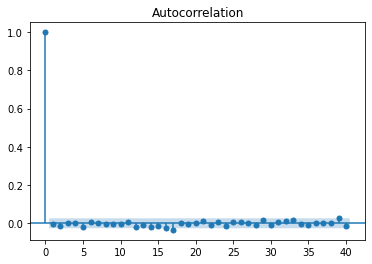

In [84]:
import statsmodels.tsa.api as smt #timeseries analysis

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)#auto_correlation value, lags= previous value
acf.show()

### Asumsi 2- Normalitas Residual 
2) Asumsi kedua adalah Normalitas Residual / Error terms.

Uji Jarque Bera model yang baik. Semakin tinggi nilai Jarque Bera test maka semakin kecil residu yang berdistribusi normal. Kami biasanya lebih suka nilai yang lebih rendah dari tes jarque bea.

Uji Jarque–Bera adalah uji kesesuaian apakah data sampel memiliki kecondongan dan kurtosis yang cocok dengan distribusi normal. Nilai yang besar untuk uji jarque-bera menunjukkan non normalitas.

Uji jarque bera menguji apakah data sampel memiliki skewness dan kurtosis yang cocok dengan distribusi normal. Perhatikan bahwa tes ini umumnya bekerja dengan baik untuk jumlah sampel data yang cukup besar (>2000) karena statistik uji asimtotik memiliki distribusi chi kuadrat dengan derajat 2 kebebasan.

In [85]:
# H0: the error terms berdistribusi normal
# dof for residuals is n-2

In [86]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

Jarque_beraResult(statistic=41267.96783286443, pvalue=0.0)


Nilai kritis chi square pada taraf signifikansi 5% adalah 5,99. Jika nilai yang dihitung melebihi nilai ini, hipotesis nol ditolak. Dalam hal ini nilai statistik JB 41267.96 yang dihitung lebih kecil dari 5,99. Jadi kami menerima hipotesis nol bahwa istilah terdistribusi normal.

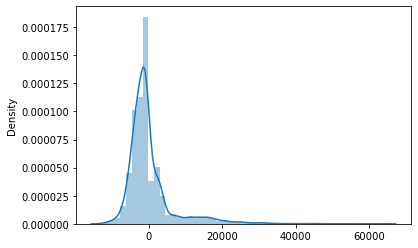

In [87]:
import seaborn as sns

sns.distplot(lin_reg.resid)
plt.show()

Dari grafik kami menyimpulkan bahwa karena nilai uji Jarque Bera yang rendah, artinya tidak berdistribusi normal

#### Asssumption 3 - Linearity of residuals

Di sini kita memiliki 2 pilihan. Entah kita dapat memplot nilai yang diamati Vs nilai prediksi dan memplot nilai prediksi Residual Vs dan melihat linearitas residual. ATAU Kita bisa pergi untuk rainbow test. Mari kita lihat keduanya satu per satu.

In [88]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)#the fraction of the data to include in the center model

(1.0435316554788037, 0.12891272792470418)

H0 : Datanya linier, pvalue > 0,05 gagal menolak H0, disini kita gagal menolak H0 sehingga residual berdistribusi normal

In [89]:
lin_reg.resid.mean()

1.1632563977749204e-09

#### Assumption 4 Homoscedasticity_test(using goldfeld test) OR (Beusch-Wagon Test) Homoscedacity
Jika varians dari residual terdistribusi secara simetris melintasi garis regresi , maka data tersebut dikatakan homoskedastis.

Heteroskedastisitas :: Jika varians tidak sama untuk residual yang melintasi garis regresi, maka data tersebut dikatakan heteroskedastis. Dalam hal ini residual dapat membentuk bentuk panah atau bentuk tidak simetris lainnya.

Pengujian ini didasarkan pada pengujian hipotesis dimana hipotesis nol dan hipotesis alternatif adalah: 0:𝜎𝑢𝑖 𝑐𝑜𝑛𝑠𝑡𝑎𝑛𝑡 𝑟𝑎𝑛𝑔𝑒 :𝜎𝑢𝑖 𝑐𝑜𝑛𝑠𝑡𝑎𝑛𝑡 Residu harus homoskedastis.

In [90]:
import statsmodels.stats.api as sms

In [91]:
name=['F-statistic','p-value']
test=sms.het_goldfeldquandt(lin_reg.resid,lin_reg.model.exog)

test

(0.8967660046813972, 0.998053616899942, 'increasing')


nilai p di bawah tingkat tertentu (seperti 0,05) menunjukkan bahwa kita harus menolak nol demi heteroskedastisitas.

#### Assumption 5- NO MULTI COLLINEARITY

Interpretasi VIF adalah sebagai berikut: akar kuadrat dari VIF variabel yang diberikan menunjukkan seberapa besar kesalahan standar, dibandingkan dengan apa yang akan terjadi jika prediktor itu tidak berkorelasi dengan fitur lain dalam model. Jika tidak ada fitur yang berkorelasi, maka semua nilai untuk VIF akan menjadi 1.

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

,vif
Number of Policies,inf
Monthly Premium Auto,26.982562
Total Claim Amount,2.332089
Income,3.112450
Number of Policies,inf
Vehicle Class_Luxury Car,7.986979
Vehicle Class_Luxury SUV,8.670853
Vehicle Class_SUV,7.532404
Vehicle Class_Sports Car,3.226091
Vehicle Class_Two-Door Car,1.124626


kita dapat melihat bahwa ada VIF yang tinggi di Number of Policies kita telah melihat dalam pendekatan statistik, variable ini tidak signifikan untuk memprediksi target maka dari kesimpulan di atas kita dapat menghapusnya

In [94]:
from sklearn.model_selection import train_test_split
X=dfn.drop(['CLV','Number of Policies'],axis=1)
y=dfn['CLV']          
y =np.log(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [95]:
numerical_cols.rename(columns={'CLV':'CLV'},inplace=True)

In [96]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3968, 23)
(3968,)
(1701, 23)
(1701,)


### Model Building

### Linear Regression

In [98]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)
print(f'R^2 score for train: {lr.score(X_train, y_train)}')
print(f'R^2 score for test: {lr.score(X_test, y_test)}')

R^2 score for train: 0.22877867528836437
R^2 score for test: 0.22367147711169366


In [99]:
y_pred = model.predict(X_test)

In [100]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.5772720723697451
MAE 0.4466900394615319
R-squared: 0.22367147711169366


In [101]:
#Feature Selection by Recursive Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X = X[cols]
    Xc = sm.add_constant(X)
    model = sm.OLS(y,Xc).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols
print(selected_features)

['Monthly Premium Auto', 'Total Claim Amount', 'Vehicle Class_SUV', 'Vehicle Class_Sports Car', 'Coverage_Extended', 'Coverage_Premium', 'Renew Offer Type_Offer2', 'Renew Offer Type_Offer3', 'Renew Offer Type_Offer4', 'EmploymentStatus_Employed', 'Education_High School or Below', 'Education_Master']


In [103]:
X_new = X[['Monthly Premium Auto', 'Total Claim Amount', 'Vehicle Class_SUV', 'Vehicle Class_Sports Car', 'Coverage_Extended', 'Coverage_Premium', 'Renew Offer Type_Offer2', 'Renew Offer Type_Offer3', 'Renew Offer Type_Offer4', 'EmploymentStatus_Employed', 'Education_High School or Below', 'Education_Master']]

In [104]:
X_constant_new=sm.add_constant(X_new)
lin_reg=sm.OLS(y,X_constant_new).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CLV   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     138.5
Date:                Mon, 23 May 2022   Prob (F-statistic):          3.03e-305
Time:                        23:37:32   Log-Likelihood:                -4934.8
No. Observations:                5669   AIC:                             9896.
Df Residuals:                    5656   BIC:                             9982.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              8.0289      0.028    288.689      0.000       7.974       8.083
Monthly Premium Auto               0.0077      0.000     21.128      0.000       0.007       0.008
Total Claim Amount                -0.0001    3.9e-05     -2.957      0.003      -0.000   -3.89e-05
Vehicle Class_SUV                  0.1384      0.022      6.184      0.000       0.095       0.182
Vehicle Class_Sports Car           0.1687      0.036      4.687      0.000       0.098       0.239
Coverage_Extended                  0.0650      0.018      3.560      0.000       0.029       0.101
Coverage_Premium                   0.0779      0.032      2.445      0.015       0.015       0.140
Renew Offer Type_Offer2           -0.1494      0.019     -8.022      0.000      -0.186      -0.113
Renew Offer Type_Offer3           -0.0899      0.023     -3.916      0.000      -0.135      -0.045
Renew Offer Type_Offer4           -0.1699      0.026     -6.458      0.000      -0.221      -0.118
EmploymentStatus_Employed          0.0823      0.018      4.571      0.000       0.047       0.118
Education_High School or Below     0.0603      0.017      3.444      0.001       0.026       0.095
Education_Master                   0.0711      0.029      2.467      0.014       0.015       0.128
==============================================================================
Omnibus:                      432.993   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              536.405
Skew:                           0.745   Prob(JB):                    3.32e-117
Kurtosis:                       3.220   Cond. No.                     2.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Ridge and Lasso Regression

In [108]:
ridge=Ridge(alpha=0.1,normalize=True)
ridge.fit(X_train,y_train)
print('Ridge Regression')
y_pred = ridge.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred)) 

Ridge Regression
RMSE: 0.5775293919608365
R-squared: 0.22297922446257057


In [109]:
ridge=Ridge(alpha=1.0,normalize=True)
ridge.fit(X_train,y_train)
print('Ridge Regression')
y_pred = ridge.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred)) 

Ridge Regression
RMSE: 0.58817330973564
R-squared: 0.1940741720081005


In [110]:
lasso = Lasso(random_state=1)
lasso.fit(X_train,y_train)
print('Ridge Regression')
y_pred = lasso.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred)) 

Ridge Regression
RMSE: 0.5840620710985016
R-squared: 0.2053013849376657


### Decision Tree Regression

In [112]:
dt = DecisionTreeRegressor(random_state=1)

dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.7623159783814643
MAE 0.5434249818679434
R-squared: -0.35379994935507186


### Random Forest Regression

In [114]:
rf = RandomForestRegressor(random_state=1)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred)) 

RMSE: 0.5550628100057401
MAE 0.41762493086100444
R-squared: 0.28225742604758797


### Hyperparameter Tuning of Random Forest Regression

In [118]:
rf = RandomForestRegressor()
params = {
        'max_depth' : [10,20,30],
        
        'n_estimators' : [100,200,50],
        
        "bootstrap" : [True, False],
    
        'max_features': ['auto', 'sqrt', 'log2']
        
        }

grid = GridSearchCV(estimator = rf, param_grid=params, cv = 5, n_jobs = -1, return_train_score = True )
grid.fit(X,y)
grid.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [139]:
rf = RandomForestRegressor(**grid.best_params_)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.5564302431515691
MAE 0.4303902379463118
R-squared: 0.2787166594196371


In [153]:
adaboost = AdaBoostRegressor(
    RandomForestRegressor(max_depth=5,criterion='mse'),
    n_estimators=150
)
adaboost.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=5),
                  n_estimators=150)

In [145]:
y_pred = adaboost.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.5746248379117106
MAE 0.4456591617466812
R-squared: 0.2307752729023076


## Conclusion

|**Model**|**R^2 Score**|**RMSE**|
|---|---|---|
|Linear Regression|0.22|0.57|
|Ridge Regression|0.19|0.58|
|Lasso Regression|0.20|0.58|
|DecisionTree Regression|-0.35|0.76|
|RandomForest Regression|0.28|0.55|
|Adaboost Regression|0.23|0.57|
|RandomForest with GridSearchCV|0.27|0.55|

Dengan membandingkan hasil skor RMSE dan R^2 model dan kemudian kami memilih model terbaik sebagai Random Forest Regression, yang memiliki skor evaluasi terbaik.

Secara keseluruhan kita dapat melihat bahwa No of Policies, Monthly Premium Auto, Total Claim Amount, Income, Coverage_Extended, EmploymentStatus_Employed dan Renew Offer Type_Offer1 adalah fitur penting dalam memprediksi Customer Lifetime Value.

Pelanggan yang memiliki lebih banyak polis dengan premi bulanan yang tinggi akan menambah nilai lebih bagi perusahaan.

Ironisnya sebagai perusahaan asuransi mobil, jenis tidak berpengaruh terhadap prediksi CLV.

Para agen asuransi harus mulai meningkatkan iklan polis mereka bagi nasabah yang memiliki no. of policies, yang merupakan fitur utama dalam memprediksi CLV.

## Recommendation

Hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

1. Jika memungkinkan, fitur-fitur pada tabel dilakukan analisis terlebih dahulu dan diperiksa korelasinya dengan target ('Income'), seperti coverage terhadap income dan lain-lain. Selain itu, adanya penambahan data terkini untuk Customer Lifetime Value tentu akan dapat mengimprovisasi kapasitas prediksi dari model.

2. Jika ada penambahan banyak data, dapat dicoba dengan menggunakan model yang lebih kompleks, seperti recursive neural networks (RNN). Namun, kalau jumlah data dan fiturnya masih seperti dataset ini, kemungkinan besar tidak akan mengubah hasilnya secara signifikan.

3. Menambahkan fitur online agar mempermudah user untuk membuat car insurance